In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read 2017-2018 NBA Regular Season Players' Stats

In [66]:
df = pd.read_csv("/Users/QiJin/Desktop/Python/2017-2018 NBA Stats.csv")
df.head()

,#,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
0,1,James Harden,HOU,72,35.4,9.0,20.1,0.449,3.7,10.0,...,0.858,4.4,2.3,0.6,4.8,5.4,8.8,1.8,0.7,30.4
1,2,Anthony Davis,NOP,75,36.4,10.4,19.5,0.534,0.7,2.2,...,0.828,2.2,2.1,2.5,8.6,11.1,2.3,1.5,2.6,28.1
2,3,LeBron James,CLE,82,36.9,10.5,19.3,0.542,1.8,5.0,...,0.731,4.2,1.7,1.2,7.5,8.6,9.1,1.4,0.9,27.5
3,4,Damian Lillard,POR,73,36.6,8.5,19.4,0.439,3.1,8.6,...,0.916,2.8,1.6,0.8,3.6,4.5,6.6,1.1,0.4,26.9
4,5,Giannis Antetokounmpo,MIL,75,36.8,9.9,18.7,0.529,0.6,1.9,...,0.760,3.0,3.1,2.1,8.0,10.0,4.8,1.5,1.4,26.9


Step 1: Check data size

In [67]:
df.shape

(279, 23)

Step 2: Check missing data

In [68]:
df.isnull().sum()

#         0
Player    0
Team      0
GP        0
MPG       0
FGM       0
FGA       0
FG%       0
3PM       0
3PA       0
3P%       0
FTM       0
FTA       0
FT%       0
TOV       0
PF        0
ORB       0
DRB       0
RPG       0
APG       0
SPG       0
BPG       0
PPG       0
dtype: int64

This dataset is perfect! It doesn’t need cleaning

Step 3: Audit data


3.1 Accuracy

Plot the boxplot of Points Per Game of each player.

{'whiskers': [<matplotlib.lines.Line2D at 0x11b697dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x11b697d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b62d5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x11b4e1400>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b4e19e8>],
 'means': []}

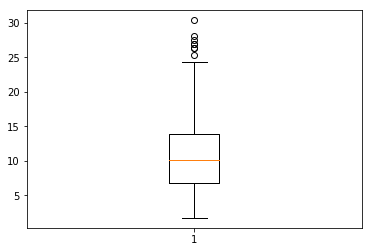

In [81]:
plt.boxplot(df['PPG'])

There are some outliers, let's check who are them.

In [82]:
df.loc[df['PPG']>24]

,#,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
0,1,James Harden,HOU,72,35.4,9.0,20.1,0.449,3.7,10.0,...,0.858,4.4,2.3,0.6,4.8,5.4,8.8,1.8,0.7,30.4
1,2,Anthony Davis,NOP,75,36.4,10.4,19.5,0.534,0.7,2.2,...,0.828,2.2,2.1,2.5,8.6,11.1,2.3,1.5,2.6,28.1
2,3,LeBron James,CLE,82,36.9,10.5,19.3,0.542,1.8,5.0,...,0.731,4.2,1.7,1.2,7.5,8.6,9.1,1.4,0.9,27.5
3,4,Damian Lillard,POR,73,36.6,8.5,19.4,0.439,3.1,8.6,...,0.916,2.8,1.6,0.8,3.6,4.5,6.6,1.1,0.4,26.9
4,5,Giannis Antetokounmpo,MIL,75,36.8,9.9,18.7,0.529,0.6,1.9,...,0.760,3.0,3.1,2.1,8.0,10.0,4.8,1.5,1.4,26.9
5,6,Stephen Curry,GSW,51,32.0,8.4,16.9,0.495,4.2,9.8,...,0.921,3.0,2.2,0.7,4.4,5.1,6.1,1.6,0.2,26.4
6,7,Kevin Durant,GSW,68,34.2,9.3,18.0,0.516,2.5,6.1,...,0.889,3.0,2.0,0.5,6.4,6.8,5.4,0.7,1.8,26.4
7,8,Russell Westbrook,OKC,80,36.4,9.5,21.1,0.449,1.2,4.1,...,0.737,4.8,2.5,1.9,8.2,10.1,10.2,1.8,0.2,25.4
8,9,Kyrie Irving,BOS,60,32.2,8.9,18.1,0.491,2.8,6.8,...,0.889,2.3,2.0,0.6,3.2,3.8,5.1,1.1,0.3,24.4


All of these players are the best players, and much better than others. So it makes scense why there are some outliers.

If exclude those outliers, then plot the histogram of Filed Goal Made per Game

In [83]:
df2 = df.loc[df['PPG']<=24]

In [84]:
df2['PPG'].mean()

10.448148148148158

In [85]:
df2['PPG'].median()

10.0

Mean value and median value are quite close, so that seems plausible.

Check the data type

3.2 Data type

In [91]:
df.dtypes

#           int64
Player     object
Team       object
GP          int64
MPG       float64
FGM       float64
FGA       float64
FG%       float64
3PM       float64
3PA       float64
3P%       float64
FTM       float64
FTA       float64
FT%       float64
TOV       float64
PF        float64
ORB       float64
DRB       float64
RPG       float64
APG       float64
SPG       float64
BPG       float64
PPG       float64
dtype: object

Perfect!